# ## Q3. How has the distribution of sunshine hours influenced the geographical distribution of solar energy generation capacity in the UK up to 2022?

In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
from IPython.display import display

## Obtain average annual sunshine hours for different regions in the UK.
# 
## Sunshine Hours Scotland

In [2]:
#Download the data from the Met Office website
url = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/Scotland.txt"
response = requests.get(url)

In [3]:
# URL to the dataset
url = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/Scotland.txt"

In [4]:
#Call the the data
response = requests.get(url)
data_str = response.text

In [5]:
# Display the first few lines to understand the structure
print(data_str.split('\n')[:10])

['Areal values from HadUK-Grid 1km gridded climate data from land surface network', 'Source: Met Office National Climate Information Centre', 'Monthly, seasonal and annual total duration of bright sunshine for Scotland', 'Areal series, starting in 1910', 'Last updated 01-Jun-2024 11:45', 'year    jan    feb    mar    apr    may    jun    jul    aug    sep    oct    nov    dec     win     spr     sum     aut     ann', '1910   37.8   62.6  109.0  117.4  174.1  179.7  142.3  105.1  113.7   76.9   54.0   27.7     ---   400.5   427.1   244.6  1200.3', '1911   33.5   53.6  115.4  102.1  206.4  192.9  180.3  167.5  117.8   77.5   47.7   26.4   114.8   423.9   540.7   242.9  1321.0', '1912   28.7   56.4   92.8  160.9  158.1   82.3  131.8   64.8  104.4   62.5   29.8   10.5   111.4   411.9   279.0   196.7   983.1', '1913   20.3   36.1   96.4  119.8  138.2  142.0  145.2  125.6   82.8   83.2   43.1   23.9    67.0   354.3   412.8   209.1  1056.6']


In [6]:
# Read the data into a pandas DataFrame
data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/482187280.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)


In [7]:
# Display the first few rows of the DataFrame
print(data.head())

   1910  37.8  62.6  109.0  117.4  174.1  179.7  142.3  105.1  113.7  76.9  \
0  1911  33.5  53.6  115.4  102.1  206.4  192.9  180.3  167.5  117.8  77.5   
1  1912  28.7  56.4   92.8  160.9  158.1   82.3  131.8   64.8  104.4  62.5   
2  1913  20.3  36.1   96.4  119.8  138.2  142.0  145.2  125.6   82.8  83.2   
3  1914  22.4  43.0   97.6  165.3  133.0  173.7  129.9  148.9  114.1  68.1   
4  1915  29.9  48.7   97.8  128.4  208.0  205.9  135.1  105.6  122.0  88.9   

   54.0  27.7    ---  400.5  427.1  244.6  1200.3  
0  47.7  26.4  114.8  423.9  540.7  242.9  1321.0  
1  29.8  10.5  111.4  411.9  279.0  196.7   983.1  
2  43.1  23.9   67.0  354.3  412.8  209.1  1056.6  
3  37.2  26.4   89.2  395.9  452.5  219.4  1159.6  
4  53.4  18.3  105.0  434.3  446.7  264.3  1242.2  


In [8]:
# Manually set the column names to ensure correctness
data.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

In [9]:
# Convert the 'year' column to integer
data['year'] = data['year'].astype(int)

In [10]:
#Handling NaN values
data.fillna(data.mean(), inplace=True)

In [11]:
# Set the 'year' column as the index
data = data.set_index('year')

In [12]:
# Calculate the mean sunshine hours for each year
mean_sunshine_hours = data.mean(axis=1)

In [13]:
# Display the mean sunshine hours for each year
print(mean_sunshine_hours)

year
1911    233.200000
1912    174.417647
1913    185.670588
1914    204.482353
1915    219.676471
           ...    
2020    218.788235
2021    217.764706
2022    217.194118
2023    226.188235
2024    218.328527
Length: 114, dtype: float64


# Display as a table 

In [14]:
#Rename the columns for clarity
mean_sunshine_hours.columns = ['Year', 'Mean Sunshine Hours']

In [15]:
# Convert the Series to a DataFrame for easier plotting
mean_sunshine_hours = mean_sunshine_hours.reset_index()
mean_sunshine_hours.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
print(mean_sunshine_hours)

     Year  Mean Sunshine Hours
0    1911           233.200000
1    1912           174.417647
2    1913           185.670588
3    1914           204.482353
4    1915           219.676471
..    ...                  ...
109  2020           218.788235
110  2021           217.764706
111  2022           217.194118
112  2023           226.188235
113  2024           218.328527

[114 rows x 2 columns]


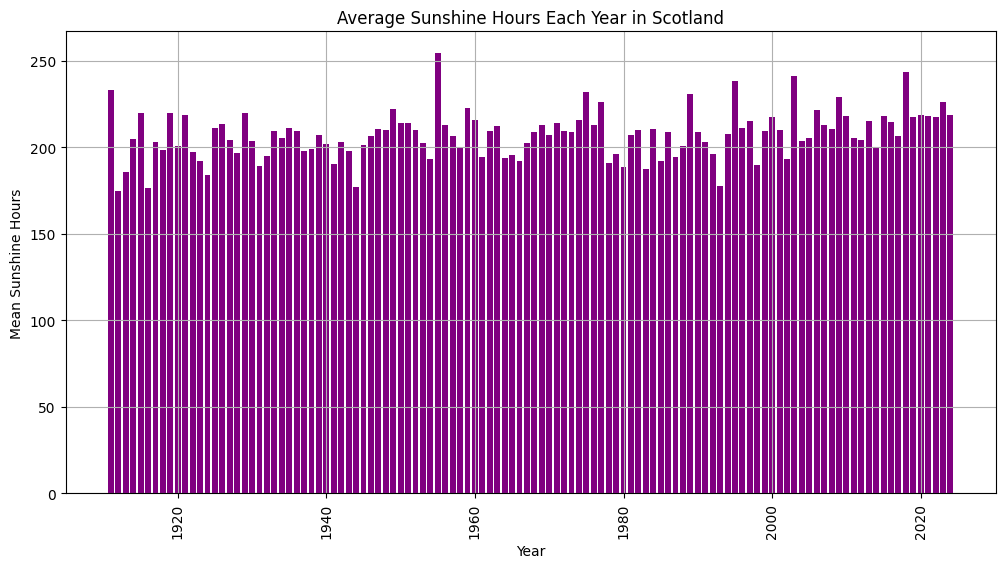

In [16]:
# Plot as bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours['Year'], mean_sunshine_hours['Mean Sunshine Hours'], color='purple')
plt.title('Average Sunshine Hours Each Year in Scotland')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Sunshine Hours Midlands

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/4104963629.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_midlands = pd.read_csv(StringIO(data_str_midlands), delim_whitespace=True, skiprows=6)


     Year  Mean Sunshine Hours
0    1911           130.516667
1    1912            94.766667
2    1913            98.366667
3    1914           120.591667
4    1915           119.491667
..    ...                  ...
109  2020           135.500000
110  2021           118.800000
111  2022           139.733333
112  2023           126.000000
113  2024           125.354277

[114 rows x 2 columns]


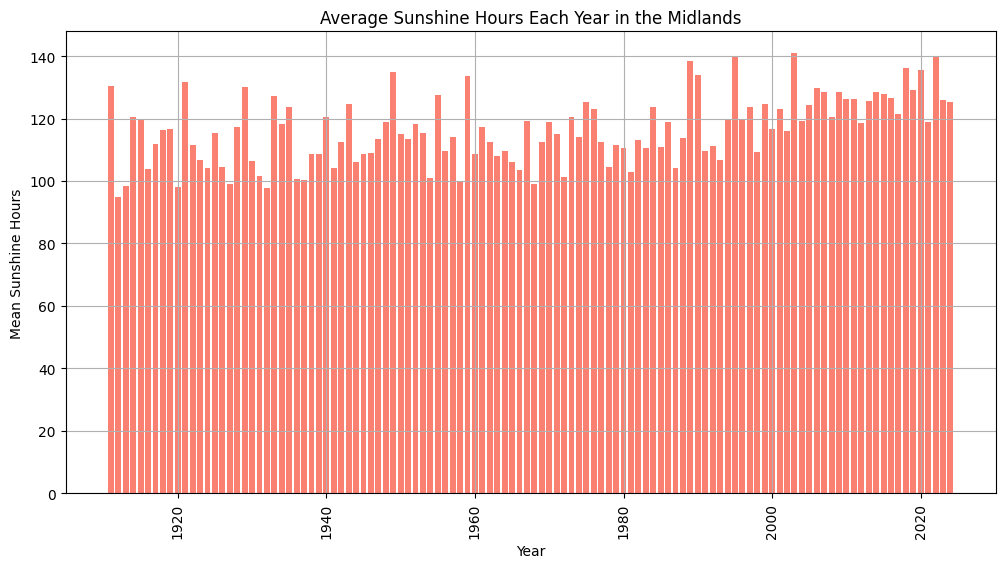

In [17]:
# URL to the dataset for the Midlands
url_midlands = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/Midlands.txt"


# Fetch the data
response_midlands = requests.get(url_midlands)
data_str_midlands = response_midlands.text

# Read the data into a pandas DataFrame
data_midlands = pd.read_csv(StringIO(data_str_midlands), delim_whitespace=True, skiprows=6)

# Manually set the column names to ensure correctness
data_midlands.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

# Convert the 'year' column to integer
data_midlands['year'] = data_midlands['year'].astype(int)

# Convert all other columns to numeric and handle non-numeric values
for column in data_midlands.columns[1:]:
    data_midlands[column] = pd.to_numeric(data_midlands[column], errors='coerce')

# Fill NaN values with the mean of each column
data_midlands.fillna(data_midlands.mean(), inplace=True)

# Set the 'year' column as the index
data_midlands.set_index('year', inplace=True)

# Calculate the mean sunshine hours for each year
mean_sunshine_hours_midlands = data_midlands[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].mean(axis=1)

# Convert the Series to a DataFrame for easier plotting
mean_sunshine_hours_midlands = mean_sunshine_hours_midlands.reset_index()
mean_sunshine_hours_midlands.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
print(mean_sunshine_hours_midlands)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours_midlands['Year'], mean_sunshine_hours_midlands['Mean Sunshine Hours'], color='salmon')
plt.title('Average Sunshine Hours Each Year in the Midlands')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Sunshine Hours England N 

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1562942148.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_england_n = pd.read_csv(StringIO(data_str_england_n), delim_whitespace=True, skiprows=6)


     Year  Mean Sunshine Hours
0    1911           122.875000
1    1912            85.075000
2    1913            92.358333
3    1914           112.633333
4    1915           112.725000
..    ...                  ...
109  2020           126.025000
110  2021           122.575000
111  2022           136.383333
112  2023           122.591667
113  2024           117.981785

[114 rows x 2 columns]


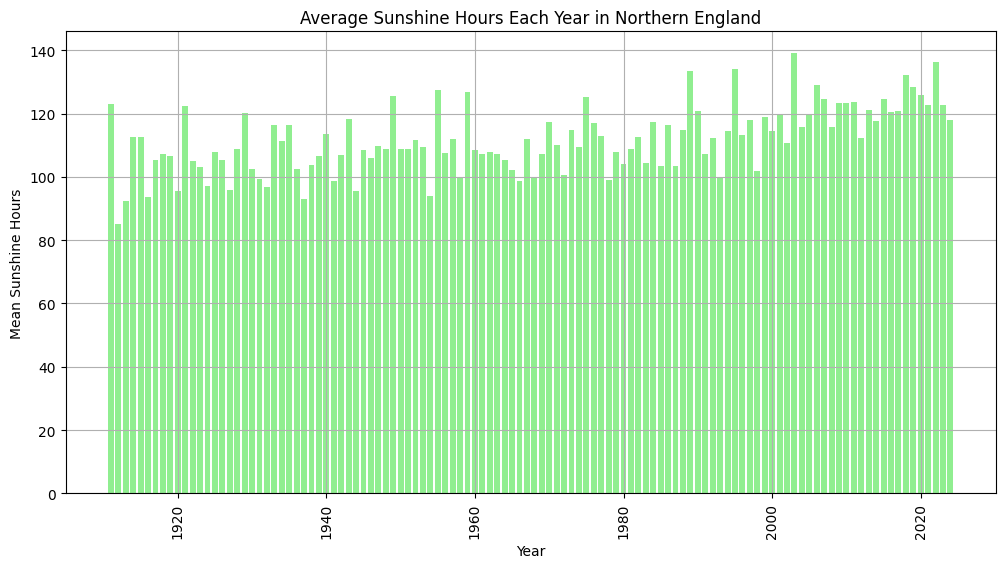

In [18]:
#URL to the dataset for Northern England
url_england_n = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/England_N.txt"

# Fetch the data
response_england_n = requests.get(url_england_n)
data_str_england_n = response_england_n.text

# Read the data into a pandas DataFrame
data_england_n = pd.read_csv(StringIO(data_str_england_n), delim_whitespace=True, skiprows=6)

# Manually set the column names to ensure correctness
data_england_n.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

# Convert the 'year' column to integer
data_england_n['year'] = data_england_n['year'].astype(int)

# Convert all other columns to numeric and handle non-numeric values
for column in data_england_n.columns[1:]:
    data_england_n[column] = pd.to_numeric(data_england_n[column], errors='coerce')

# Fill NaN values with the mean of each column
data_england_n.fillna(data_england_n.mean(), inplace=True)

# Set the 'year' column as the index
data_england_n.set_index('year', inplace=True)

# Calculate the mean sunshine hours for each year
mean_sunshine_hours_england_n = data_england_n[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].mean(axis=1)

# Convert the Series to a DataFrame for easier plotting
mean_sunshine_hours_england_n = mean_sunshine_hours_england_n.reset_index()
mean_sunshine_hours_england_n.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
print(mean_sunshine_hours_england_n)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours_england_n['Year'], mean_sunshine_hours_england_n['Mean Sunshine Hours'], color='lightgreen')
plt.title('Average Sunshine Hours Each Year in Northern England')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Sunshine Hours England S

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1851986216.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_england_s = pd.read_csv(StringIO(data_str_england_s), delim_whitespace=True, skiprows=6)


     Year  Mean Sunshine Hours
0    1911           146.808333
1    1912           108.225000
2    1913           110.991667
3    1914           134.375000
4    1915           127.575000
..    ...                  ...
109  2020           146.941667
110  2021           124.616667
111  2022           150.466667
112  2023           134.175000
113  2024           137.576254

[114 rows x 2 columns]


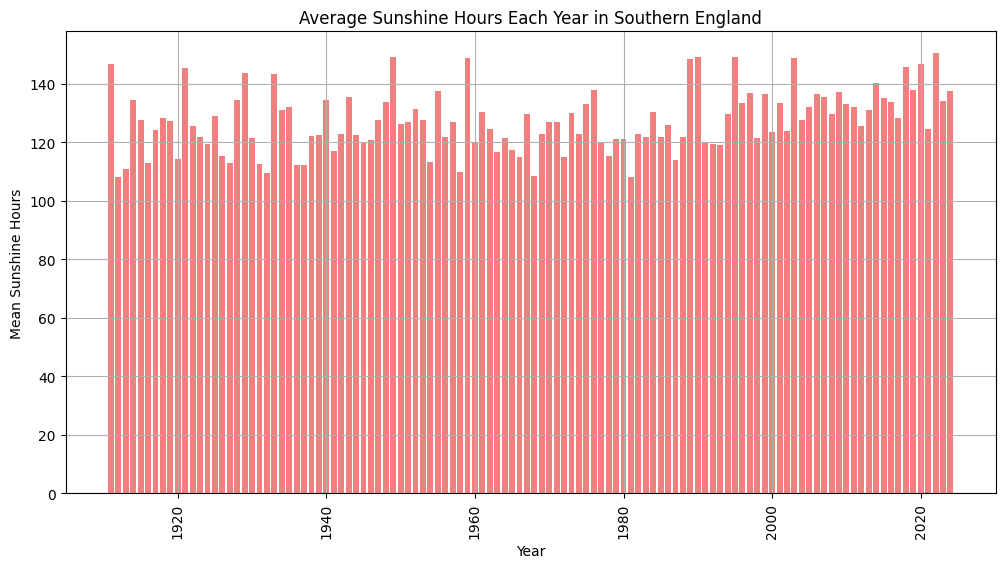

In [19]:
#URL to the dataset for Southern England
url_england_s = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/England_S.txt"

# Fetch the data
response_england_s = requests.get(url_england_s)
data_str_england_s = response_england_s.text

# Read the data into a pandas DataFrame
data_england_s = pd.read_csv(StringIO(data_str_england_s), delim_whitespace=True, skiprows=6)

# Manually set the column names to ensure correctness
data_england_s.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

# Convert the 'year' column to integer
data_england_s['year'] = data_england_s['year'].astype(int)

# Convert all other columns to numeric and handle non-numeric values
for column in data_england_s.columns[1:]:
    data_england_s[column] = pd.to_numeric(data_england_s[column], errors='coerce')

# Fill NaN values with the mean of each column
data_england_s.fillna(data_england_s.mean(), inplace=True)

# Set the 'year' column as the index
data_england_s.set_index('year', inplace=True)

# Calculate the mean sunshine hours for each year
mean_sunshine_hours_england_s = data_england_s[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].mean(axis=1)

# Convert the Series to a DataFrame for easier plotting
mean_sunshine_hours_england_s = mean_sunshine_hours_england_s.reset_index()
mean_sunshine_hours_england_s.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
print(mean_sunshine_hours_england_s)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours_england_s['Year'], mean_sunshine_hours_england_s['Mean Sunshine Hours'], color='lightcoral')
plt.title('Average Sunshine Hours Each Year in Southern England')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Sunshine Hours Northern Ireland

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/3417568308.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_northern_ireland = pd.read_csv(StringIO(data_str_northern_ireland), delim_whitespace=True, skiprows=6)


Year  Mean Sunshine Hours
0    1911           126.275000
1    1912            91.900000
2    1913            99.541667
3    1914           106.000000
4    1915           111.216667
..    ...                  ...
109  2020           107.033333
110  2021           105.116667
111  2022           107.466667
112  2023           101.800000
113  2024           114.800811

[114 rows x 2 columns]

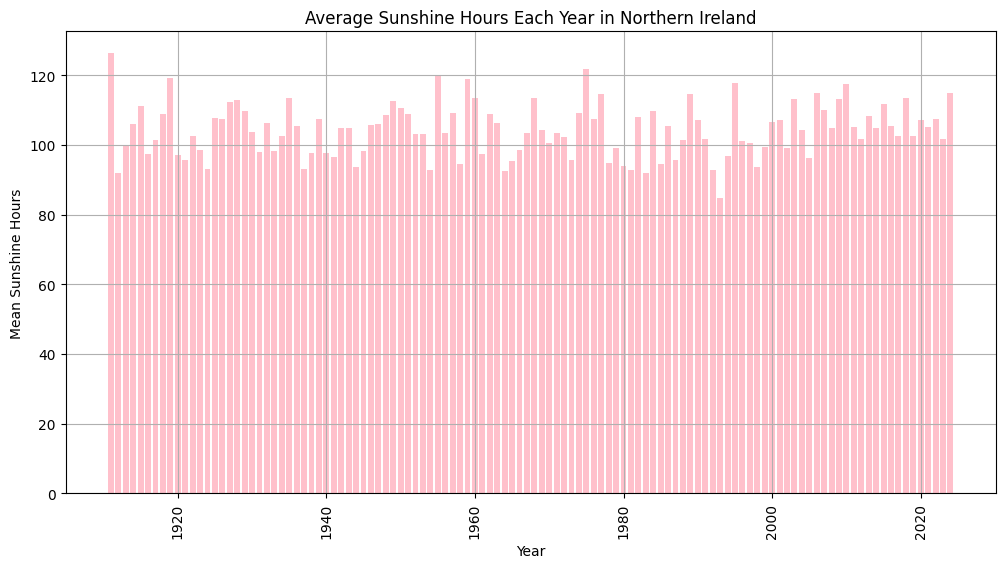

In [20]:
# URL to the dataset for Northern Ireland
url_northern_ireland = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/Northern_Ireland.txt"

# Fetch the data
response_northern_ireland = requests.get(url_northern_ireland)
data_str_northern_ireland = response_northern_ireland.text

# Read the data into a pandas DataFrame
data_northern_ireland = pd.read_csv(StringIO(data_str_northern_ireland), delim_whitespace=True, skiprows=6)

# Manually set the column names to ensure correctness
data_northern_ireland.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

# Convert the 'year' column to integer
data_northern_ireland['year'] = data_northern_ireland['year'].astype(int)

# Convert all other columns to numeric, forcing errors to NaN
for column in data_northern_ireland.columns[1:]:
    data_northern_ireland[column] = pd.to_numeric(data_northern_ireland[column], errors='coerce')

# Handle missing values (example: fill with the column mean)
data_northern_ireland.fillna(data_northern_ireland.mean(), inplace=True)

# Calculate the mean sunshine hours for each year
mean_sunshine_hours_northern_ireland = data_northern_ireland[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].set_index('year').mean(axis=1).reset_index()

# Rename the columns for clarity
mean_sunshine_hours_northern_ireland.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
display(mean_sunshine_hours_northern_ireland)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours_northern_ireland['Year'], mean_sunshine_hours_northern_ireland['Mean Sunshine Hours'], color='pink')
plt.title('Average Sunshine Hours Each Year in Northern Ireland')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Sunshine Hours Wales

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/650162627.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_wales = pd.read_csv(StringIO(data_str_wales), delim_whitespace=True, skiprows=6)


Year  Mean Sunshine Hours
0    1911           135.725000
1    1912            98.058333
2    1913           106.858333
3    1914           120.783333
4    1915           120.125000
..    ...                  ...
109  2020           123.925000
110  2021           116.658333
111  2022           126.816667
112  2023           113.083333
113  2024           117.307743

[114 rows x 2 columns]

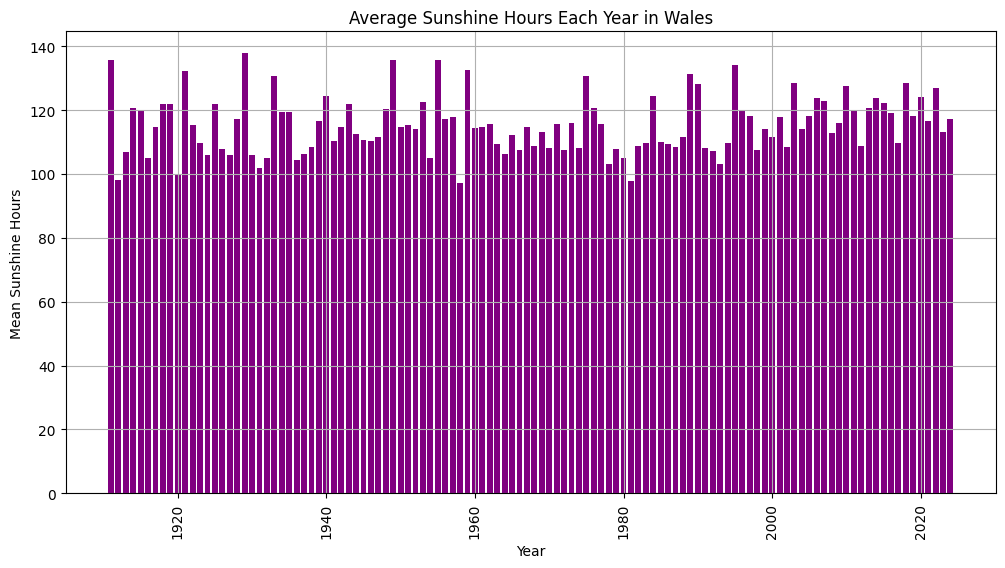

In [21]:
# URL to the dataset for Wales
url_wales = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/Wales.txt"

# Fetch the data
response_wales = requests.get(url_wales)
data_str_wales = response_wales.text

# Read the data into a pandas DataFrame
data_wales = pd.read_csv(StringIO(data_str_wales), delim_whitespace=True, skiprows=6)

# Manually set the column names to ensure correctness
data_wales.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']

# Convert the 'year' column to integer
data_wales['year'] = data_wales['year'].astype(int)

# Convert all other columns to numeric, forcing errors to NaN
for column in data_wales.columns[1:]:
    data_wales[column] = pd.to_numeric(data_wales[column], errors='coerce')

# Handle missing values (example: fill with the column mean)
data_wales.fillna(data_wales.mean(), inplace=True)

# Calculate the mean sunshine hours for each year
mean_sunshine_hours_wales = data_wales[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].set_index('year').mean(axis=1).reset_index()

# Rename the columns for clarity
mean_sunshine_hours_wales.columns = ['Year', 'Mean Sunshine Hours']

# Display the DataFrame as a table
display(mean_sunshine_hours_wales)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_sunshine_hours_wales['Year'], mean_sunshine_hours_wales['Mean Sunshine Hours'], color='purple')
plt.title('Average Sunshine Hours Each Year in Wales')
plt.xlabel('Year')
plt.ylabel('Mean Sunshine Hours')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

### Generate and display a Bar Chart and Box and Whiskers Diagram showing the mean annual sunshine hours for Wales, Scotland, Midlands, England S, England N, Northern Ireland

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The

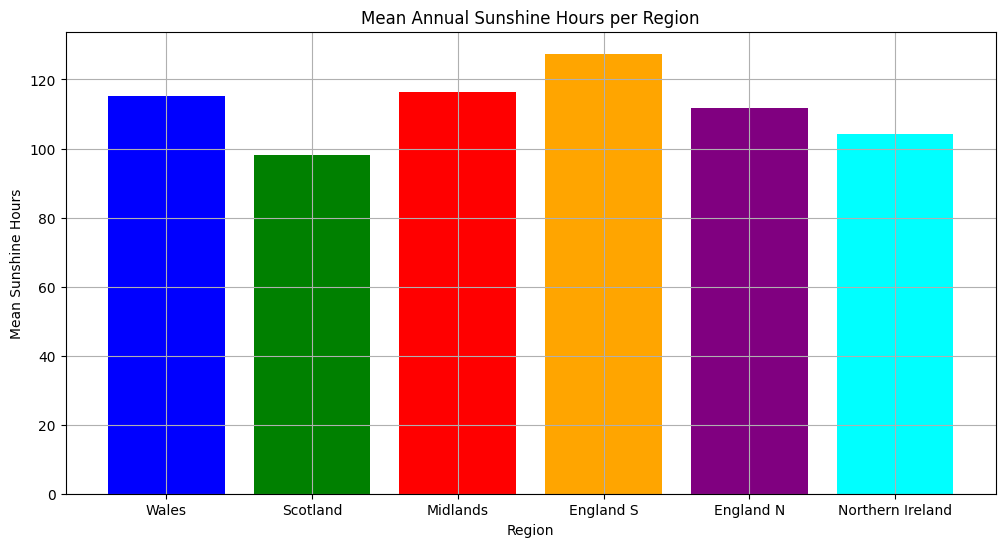

In [22]:
# Dictionary to hold the URLs and region names
urls = {
    "Wales": url_wales,
    "Scotland": url,
    "Midlands": url_midlands,
    "England S": url_england_s,
    "England N": url_england_n,
    "Northern Ireland": url_northern_ireland
}

# Function to fetch and process data
def fetch_and_process_data(url):
    response = requests.get(url)
    data_str = response.text
    data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
    data.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'win', 'spr', 'sum', 'aut', 'ann']
    data['year'] = data['year'].astype(int)
    for column in data.columns[1:]:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    data.fillna(data.mean(), inplace=True)
    data.set_index('year', inplace=True)
    mean_sunshine_hours = data[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']].mean(axis=1)
    mean_sunshine_hours = mean_sunshine_hours.reset_index()
    mean_sunshine_hours.columns = ['Year', 'Mean Sunshine Hours']
    return mean_sunshine_hours

# Fetch and process data for each region and store the mean annual sunshine hours
regions_data = {}
for region, url in urls.items():
    mean_sunshine_hours = fetch_and_process_data(url)
    regions_data[region] = mean_sunshine_hours['Mean Sunshine Hours'].mean()

# Prepare data for plotting
df_mean_hours = pd.DataFrame(list(regions_data.items()), columns=['Region', 'Mean Sunshine Hours'])

# Plot the combined results as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_mean_hours['Region'], df_mean_hours['Mean Sunshine Hours'], color=['blue', 'green', 'red', 'orange', 'purple', 'cyan'])
plt.title('Mean Annual Sunshine Hours per Region')
plt.xlabel('Region')
plt.ylabel('Mean Sunshine Hours')
plt.grid(True)
plt.show()

In [23]:
# Fetch and process data for each region and store the mean annual sunshine hours
regions_data = {}
for region, url in urls.items():
    mean_sunshine_hours = fetch_and_process_data(url)
    regions_data[region] = mean_sunshine_hours['Mean Sunshine Hours'].mean()

/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The

In [24]:
# Prepare the summary DataFrame
summary_df = pd.DataFrame(list(regions_data.items()), columns=['Region', 'Mean Sunshine Hours'])

In [25]:
# Display the summary table
print(summary_df)

             Region  Mean Sunshine Hours
0             Wales           115.321194
1          Scotland            98.052218
2          Midlands           116.419336
3         England S           127.463023
4         England N           111.735659
5  Northern Ireland           104.246645


/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, skiprows=6)
/var/folders/g1/stp6sbtd4wb9qr6lpx3zsgbr0000gn/T/ipykernel_6527/1353067159.py:15: FutureWarning: The

<Figure size 1200x600 with 0 Axes>

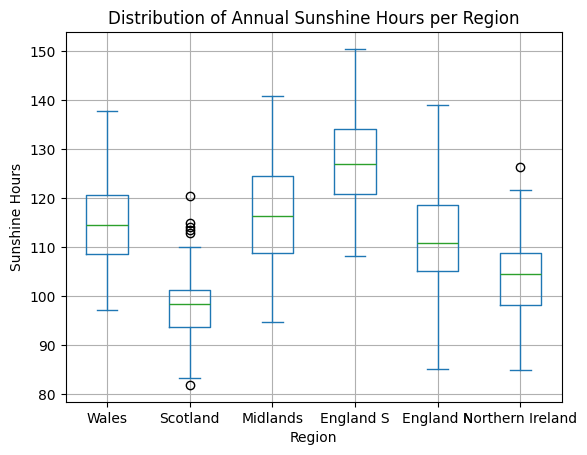

In [26]:
# Fetch and process data for each region
regions_data = {region: fetch_and_process_data(url) for region, url in urls.items()}

# Prepare data for plotting
df_mean_hours = pd.concat([df.set_index('Year') for df in regions_data.values()], axis=1)
df_mean_hours.columns = regions_data.keys()

# Plot the combined results as a box-and-whisker plot
plt.figure(figsize=(12, 6))
df_mean_hours.plot(kind='box')
plt.title('Distribution of Annual Sunshine Hours per Region')
plt.xlabel('Region')
plt.ylabel('Sunshine Hours')
plt.grid(True)
plt.show()

In [27]:
### Obtain and Clean Solar Data set

In [28]:
# Path to the CSV file
file_path = '/Users/shaniquesmith/Desktop/CFG/Final Project/group_4_data/Data/Regional_spreadsheets__2003-2022__-_installed_capacity__MW_.csv'

In [29]:
# Load the dataset
data_full = pd.read_csv(file_path, skiprows=5, header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shaniquesmith/Desktop/CFG/Final Project/group_4_data/Data/Regional_spreadsheets__2003-2022__-_installed_capacity__MW_.csv'

In [ ]:
print("Full dataset:")
display(data_full)

Full dataset:


0     1     2     3     4     5   \
0    MW installed capacity - Onshore wind   NaN   NaN   NaN   NaN   NaN   
1                                  Region  2003  2004  2005  2006  2007   
2                                 England   [y]   [y]   [y]   [y]   [y]   
3                           East Midlands   [y]   [y]   [y]   [y]   [y]   
4                         East of England   [y]   [y]   [y]   [y]   [y]   
..                                    ...   ...   ...   ...   ...   ...   
133                                   NaN   NaN   NaN   NaN   NaN   NaN   
134                                   NaN   NaN   NaN   NaN   NaN   NaN   
135                                   NaN   NaN   NaN   NaN   NaN   NaN   
136                                   NaN   NaN   NaN   NaN   NaN   NaN   
137                                   NaN   NaN   NaN   NaN   NaN   NaN   

        6      7      8        9   ...       14       15       16       17  \
0      NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   
1     2008   2009   2010     2011  ...     2016     2017     2018     2019   
2     565    748    865    1,022   ...   2,804    3,060    3,064    3,064    
3      99    106    116      129   ...     405      447      445      440    
4     126    124    127      133   ...     457      474      453      457    
..     ...    ...    ...      ...  ...      ...      ...      ...      ...   
133    NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   
134    NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   
135    NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   
136    NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   
137    NaN    NaN    NaN      NaN  ...      NaN      NaN      NaN      NaN   

          18       19       20  21  22  23  
0        NaN      NaN      NaN NaN NaN NaN  
1       2020     2021     2022 NaN NaN NaN  
2     3,084    3,085    3,083  NaN NaN NaN  
3       442      442      442  NaN NaN NaN  
4       470      470      467  NaN NaN NaN  
..       ...      ...      ...  ..  ..  ..  
133      NaN      NaN      NaN NaN NaN NaN  
134      NaN      NaN      NaN NaN NaN NaN  
135      NaN      NaN      NaN NaN NaN NaN  
136      NaN      NaN      NaN NaN NaN NaN  
137      NaN      NaN      NaN NaN NaN NaN  

[138 rows x 24 columns]

In [ ]:
# Find the start index
start_index = data_full[data_full.iloc[:, 0].str.contains('MW installed capacity - PV', na=False)].index[0]

In [ ]:
# Find the end index
end_index = data_full[data_full.iloc[:, 0].str.contains('UK Total', na=False)].index[-1]

In [ ]:
# Extract the relevant data
filtered_data = data_full.iloc[start_index:end_index + 1]

In [ ]:
filtered_data

0       1       2       3       4       5   \
34   MW installed capacity - PV     NaN     NaN     NaN     NaN     NaN   
35                       Region    2003    2004    2005    2006    2007   
36                      England    [y]     [y]     [y]     [y]     [y]    
37                East Midlands    [y]     [y]     [y]     [y]     [y]    
38              East of England    [y]     [y]     [y]     [y]     [y]    
..                          ...     ...     ...     ...     ...     ...   
114            Northern Ireland     [y]     [y]     [y]     [y]     [y]   
115                    Scotland     [y]     [y]     [y]     [y]     [y]   
116                       Wales     [y]     [y]     [y]     [y]     [y]   
117        Other Sites [note 5]     [y]     [y]     [y]     [y]     [y]   
118                    UK Total     [y]     [y]     [y]     [y]     [y]   

        6      7      8        9   ...        14        15        16  \
34     NaN    NaN    NaN      NaN  ...       NaN       NaN       NaN   
35    2008   2009   2010     2011  ...      2016      2017      2018   
36      1      1     65      844   ...   10,352    10,927    11,085    
37      0      0      6       96   ...    1,374     1,482     1,513    
38      0      0      8      101   ...    1,885     1,931     1,968    
..     ...    ...    ...      ...  ...       ...       ...       ...   
114     3      3      6        5   ...       66        85       108    
115    66    113    115      123   ...      268       303       340    
116    20     40     40       43   ...      109       158       189    
117   -      -      -        -     ...      -         -         -      
118   697    789    875    1,850   ...    4,446     4,748     6,257    

           17        18        19        20  21  22  23  
34        NaN       NaN       NaN       NaN NaN NaN NaN  
35       2019      2020      2021      2022 NaN NaN NaN  
36    11,494    11,622    11,858    12,494  NaN NaN NaN  
37     1,539     1,518     1,531     1,603  NaN NaN NaN  
38     2,020     2,081     2,162     2,252  NaN NaN NaN  
..        ...       ...       ...       ...  ..  ..  ..  
114      135       141       144       145  NaN NaN NaN  
115      394       394       402       400  NaN NaN NaN  
116      218       237       240       240  NaN NaN NaN  
117        5         5         5         5  NaN NaN NaN  
118    6,535     6,676     6,767     6,850  NaN NaN NaN  

[85 rows x 24 columns]

In [ ]:
# Define new column names
new_column_names = ['Region'] + list(range(2003, 2023)) + list(filtered_data.columns[21:])

In [ ]:
# Assign new column names to the DataFrame
filtered_data.columns = new_column_names

In [ ]:
filtered_data

Region    2003    2004    2005    2006    2007  \
34   MW installed capacity - PV     NaN     NaN     NaN     NaN     NaN   
35                       Region    2003    2004    2005    2006    2007   
36                      England    [y]     [y]     [y]     [y]     [y]    
37                East Midlands    [y]     [y]     [y]     [y]     [y]    
38              East of England    [y]     [y]     [y]     [y]     [y]    
..                          ...     ...     ...     ...     ...     ...   
114            Northern Ireland     [y]     [y]     [y]     [y]     [y]   
115                    Scotland     [y]     [y]     [y]     [y]     [y]   
116                       Wales     [y]     [y]     [y]     [y]     [y]   
117        Other Sites [note 5]     [y]     [y]     [y]     [y]     [y]   
118                    UK Total     [y]     [y]     [y]     [y]     [y]   

      2008   2009   2010     2011  ...      2016      2017      2018  \
34     NaN    NaN    NaN      NaN  ...       NaN       NaN       NaN   
35    2008   2009   2010     2011  ...      2016      2017      2018   
36      1      1     65      844   ...   10,352    10,927    11,085    
37      0      0      6       96   ...    1,374     1,482     1,513    
38      0      0      8      101   ...    1,885     1,931     1,968    
..     ...    ...    ...      ...  ...       ...       ...       ...   
114     3      3      6        5   ...       66        85       108    
115    66    113    115      123   ...      268       303       340    
116    20     40     40       43   ...      109       158       189    
117   -      -      -        -     ...      -         -         -      
118   697    789    875    1,850   ...    4,446     4,748     6,257    

         2019      2020      2021      2022  21  22  23  
34        NaN       NaN       NaN       NaN NaN NaN NaN  
35       2019      2020      2021      2022 NaN NaN NaN  
36    11,494    11,622    11,858    12,494  NaN NaN NaN  
37     1,539     1,518     1,531     1,603  NaN NaN NaN  
38     2,020     2,081     2,162     2,252  NaN NaN NaN  
..        ...       ...       ...       ...  ..  ..  ..  
114      135       141       144       145  NaN NaN NaN  
115      394       394       402       400  NaN NaN NaN  
116      218       237       240       240  NaN NaN NaN  
117        5         5         5         5  NaN NaN NaN  
118    6,535     6,676     6,767     6,850  NaN NaN NaN  

[85 rows x 24 columns]

In [ ]:
# Drop rows with index 34 and 35
filtered_data = filtered_data.drop(index=[34, 35])

In [ ]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
print (filtered_data.columns)

Index(['Region',     2003,     2004,     2005,     2006,     2007,     2008,
           2009,     2010,     2011,     2012,     2013,     2014,     2015,
           2016,     2017,     2018,     2019,     2020,     2021,     2022,
             21,       22,       23],
      dtype='object')


In [ ]:
# Drop columns named 21, 22, and 23
filtered_data = filtered_data.drop(columns=[21, 22, 23])

In [ ]:
# Drop rows from index 49 to 118
filtered_data = filtered_data.drop(index=range(49, 118))

In [ ]:
# Drop the row at index 118
filtered_data = filtered_data.drop(index=118)

In [ ]:
# Drop the row at index 36
filtered_data = filtered_data.drop(index=36)

In [ ]:
# Replace all '[y]' strings with NaN, preserving numeric values
filtered_data = filtered_data.applymap(lambda x: np.nan if x == '[y]' else x)

/var/folders/zt/3hppf5wx0015qylc6qj9zf080000gn/T/ipykernel_30665/2885226437.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data = filtered_data.applymap(lambda x: np.nan if x == '[y]' else x)


In [ ]:
# Convert all columns except the first one to numeric, coercing errors to NaN
filtered_data.iloc[:, 1:] = filtered_data.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [ ]:
# Fill missing values from 2003 to 2009 using backfill method
filtered_data.loc[:, 2003:2009] = filtered_data.loc[:, 2003:2009].fillna(method='bfill', axis='columns')

/var/folders/zt/3hppf5wx0015qylc6qj9zf080000gn/T/ipykernel_30665/1360040669.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data.loc[:, 2003:2009] = filtered_data.loc[:, 2003:2009].fillna(method='bfill', axis='columns')


In [ ]:
filtered_data['Region'] = filtered_data['Region'].astype(str)

In [ ]:
# Fill missing values from 2003 to 2009 using backfill method
filtered_data.loc[:, 2003:2009] = filtered_data.loc[:, 2003:2009].fillna(method='bfill', axis='columns')

/var/folders/zt/3hppf5wx0015qylc6qj9zf080000gn/T/ipykernel_30665/1360040669.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data.loc[:, 2003:2009] = filtered_data.loc[:, 2003:2009].fillna(method='bfill', axis='columns')


In [ ]:
# Ensure columns 2003 to 2009 are treated as strings if they are not
columns = [str(year) for year in range(2003, 2010)]

In [ ]:
filtered_data

Region 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012  \
37           East Midlands  0.0  0.0  0.0  0.0  0.0  0.0  0.0    6   96  168   
38         East of England  0.0  0.0  0.0  0.0  0.0  0.0  0.0    8  101  182   
39              North East  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1   24   50   
40              North West  NaN  NaN  NaN  NaN  NaN  NaN  NaN    4   59  117   
41                  London  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4   25   43   
42              South East  1.0  1.0  1.0  1.0  1.0  1.0  1.0   15  163  269   
43              South West  0.0  0.0  0.0  0.0  0.0  0.0  0.0   14  242  392   
44           West Midlands  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4   62  118   
45  Yorkshire & The Humber  NaN  NaN  NaN  NaN  NaN  NaN  NaN    8   73  130   
46        Northern Ireland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1    2    6   
47                Scotland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2   47   91   
48                   Wales  0.0  0.0  0.0  0.0  0.0  0.0  0.0    3   60  109   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
37  275   526  1096  1374  1482  1513  1539  1518  1531  1603  
38  407   888  1572  1885  1931  1968  2020  2081  2162  2252  
39   73   102   157   211   220   234   245   247   253   270  
40  160   215   372   482   537   566   614   628   643   687  
41   54    68    96   113   118   129   191   205   219   246  
42  443   895  1617  1979  2070  2089  2154  2183  2223  2332  
43  756  1542  2552  3058  3187  3190  3238  3249  3279  3430  
44  175   285   549   737   830   841   873   883   908   992  
45  181   250   416   514   551   557   621   628   639   681  
46   27    62   105   134   252   322   334   336   340   352  
47  127   167   240   292   323   347   394   420   452   503  
48  149   374   696   962  1055  1073  1093  1123  1213  1247

In [ ]:
# Columns are integers, no need to convert them to strings
columns = list(range(2003, 2010))

In [ ]:
# Apply backfill for the specified rows and columns without the axis parameter
filtered_data.loc[40, columns] = filtered_data.loc[40, columns].fillna(method='bfill')
filtered_data.loc[45, columns] = filtered_data.loc[45, columns].fillna(method='bfill')

/var/folders/zt/3hppf5wx0015qylc6qj9zf080000gn/T/ipykernel_30665/1047170055.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data.loc[40, columns] = filtered_data.loc[40, columns].fillna(method='bfill')
/var/folders/zt/3hppf5wx0015qylc6qj9zf080000gn/T/ipykernel_30665/1047170055.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data.loc[45, columns] = filtered_data.loc[45, columns].fillna(method='bfill')


In [ ]:
filtered_data

Region 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012  \
37           East Midlands  0.0  0.0  0.0  0.0  0.0  0.0  0.0    6   96  168   
38         East of England  0.0  0.0  0.0  0.0  0.0  0.0  0.0    8  101  182   
39              North East  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1   24   50   
40              North West  NaN  NaN  NaN  NaN  NaN  NaN  NaN    4   59  117   
41                  London  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4   25   43   
42              South East  1.0  1.0  1.0  1.0  1.0  1.0  1.0   15  163  269   
43              South West  0.0  0.0  0.0  0.0  0.0  0.0  0.0   14  242  392   
44           West Midlands  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4   62  118   
45  Yorkshire & The Humber  NaN  NaN  NaN  NaN  NaN  NaN  NaN    8   73  130   
46        Northern Ireland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1    2    6   
47                Scotland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2   47   91   
48                   Wales  0.0  0.0  0.0  0.0  0.0  0.0  0.0    3   60  109   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
37  275   526  1096  1374  1482  1513  1539  1518  1531  1603  
38  407   888  1572  1885  1931  1968  2020  2081  2162  2252  
39   73   102   157   211   220   234   245   247   253   270  
40  160   215   372   482   537   566   614   628   643   687  
41   54    68    96   113   118   129   191   205   219   246  
42  443   895  1617  1979  2070  2089  2154  2183  2223  2332  
43  756  1542  2552  3058  3187  3190  3238  3249  3279  3430  
44  175   285   549   737   830   841   873   883   908   992  
45  181   250   416   514   551   557   621   628   639   681  
46   27    62   105   134   252   322   334   336   340   352  
47  127   167   240   292   323   347   394   420   452   503  
48  149   374   696   962  1055  1073  1093  1123  1213  1247

In [ ]:
# Merge North East, North West, and Yorkshire and Humber into North of England
regions_to_merge = ['North East', 'North West', 'Yorkshire and The Humber']
merged_region_name = 'North of England'

In [ ]:
# Sum the values for the specified regions
merged_region_data = filtered_data[filtered_data['Region'].isin(regions_to_merge)].iloc[:, 1:].mean()

In [ ]:
# Sum the values for the specified regions
merged_region_data = filtered_data[filtered_data['Region'].isin(regions_to_merge)].iloc[:, 1:].mean()

In [ ]:
# Create a new row for the merged region
merged_region_row = pd.Series([merged_region_name] + merged_region_data.tolist(), index=filtered_data.columns)

In [ ]:
# Append the new row to the DataFrame using pd.concat
filtered_data = pd.concat([filtered_data, pd.DataFrame([merged_region_row])], ignore_index=True)

In [ ]:
# Remove the original rows for the specified regions
filtered_data = filtered_data[~filtered_data['Region'].isin(regions_to_merge)]

In [ ]:
# Remove the original rows for the specified regions
filtered_data = filtered_data[~filtered_data['Region'].isin(regions_to_merge)]

In [ ]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Correct the typo and merge the specified regions
filtered_data['Region'] = filtered_data['Region'].replace(
    ['North of England', 'Yorkshire & The Humber'], 'North of England')

In [ ]:
# Group by the new Region column and aggregate using mean as an example aggregation function
aggregated_data = filtered_data.groupby('Region').mean().reset_index()

In [ ]:
# Drop the row at index 8
filtered_data = filtered_data.drop(index=8)

In [ ]:
# Merge "West Midlands" and "East Midlands" into "Midlands"
filtered_data['Region'] = filtered_data['Region'].replace(
    ['West Midlands', 'East Midlands'], 'Midlands')

In [ ]:
# Group by the new Region column and aggregate
aggregated_data = filtered_data.groupby('Region').mean().reset_index()

In [ ]:
# Drop the row at index 0
filtered_data = filtered_data.drop(index=0)

In [ ]:
filtered_data

Region 2003 2004 2005 2006 2007 2008 2009 2010  2011  2012  \
1    East of England  0.0  0.0  0.0  0.0  0.0  0.0  0.0    8   101   182   
4             London  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4    25    43   
5         South East  1.0  1.0  1.0  1.0  1.0  1.0  1.0   15   163   269   
6         South West  0.0  0.0  0.0  0.0  0.0  0.0  0.0   14   242   392   
7           Midlands  0.0  0.0  0.0  0.0  0.0  0.0  0.0    4    62   118   
9   Northern Ireland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1     2     6   
10          Scotland  0.0  0.0  0.0  0.0  0.0  0.0  0.0    2    47    91   
11             Wales  0.0  0.0  0.0  0.0  0.0  0.0  0.0    3    60   109   
12  North of England  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.5  41.5  83.5   

     2013   2014   2015   2016   2017   2018   2019   2020   2021   2022  
1     407    888   1572   1885   1931   1968   2020   2081   2162   2252  
4      54     68     96    113    118    129    191    205    219    246  
5     443    895   1617   1979   2070   2089   2154   2183   2223   2332  
6     756   1542   2552   3058   3187   3190   3238   3249   3279   3430  
7     175    285    549    737    830    841    873    883    908    992  
9      27     62    105    134    252    322    334    336    340    352  
10    127    167    240    292    323    347    394    420    452    503  
11    149    374    696    962   1055   1073   1093   1123   1213   1247  
12  116.5  158.5  264.5  346.5  378.5  400.0  429.5  437.5  448.0  478.5

In [ ]:
# Merge "East of England," "London," "South East," and "South West" into "Southern England"
filtered_data['Region'] = filtered_data['Region'].replace(
       ['East of England', 'London', 'South East', 'South West'], 'Southern England')

# Group by the new Region column and aggregate
aggregated_data = filtered_data.groupby('Region').mean().reset_index()

In [ ]:
aggregated_data

Region  2003  2004  2005  2006  2007  2008  2009   2010    2011  \
0          Midlands   0.0   0.0   0.0   0.0   0.0   0.0   0.0    4.0    62.0   
1  North of England   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.5    41.5   
2  Northern Ireland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0     2.0   
3          Scotland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.0    47.0   
4  Southern England  0.25  0.25  0.25  0.25  0.25  0.25  0.25  10.25  132.75   
5             Wales   0.0   0.0   0.0   0.0   0.0   0.0   0.0    3.0    60.0   

    2012   2013    2014     2015     2016    2017    2018     2019    2020  \
0  118.0  175.0   285.0    549.0    737.0   830.0   841.0    873.0   883.0   
1   83.5  116.5   158.5    264.5    346.5   378.5   400.0    429.5   437.5   
2    6.0   27.0    62.0    105.0    134.0   252.0   322.0    334.0   336.0   
3   91.0  127.0   167.0    240.0    292.0   323.0   347.0    394.0   420.0   
4  221.5  415.0  848.25  1459.25  1758.75  1826.5  1844.0  1900.75  1929.5   
5  109.0  149.0   374.0    696.0    962.0  1055.0  1073.0   1093.0  1123.0   

      2021    2022  
0    908.0   992.0  
1    448.0   478.5  
2    340.0   352.0  
3    452.0   503.0  
4  1970.75  2065.0  
5   1213.0  1247.0

In [ ]:
# Group by the new Region column and aggregate
solar_capacity_data = filtered_data.groupby('Region').mean().reset_index()

In [ ]:
solar_capacity_data

Region  2003  2004  2005  2006  2007  2008  2009   2010    2011  \
0          Midlands   0.0   0.0   0.0   0.0   0.0   0.0   0.0    4.0    62.0   
1  North of England   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.5    41.5   
2  Northern Ireland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0     2.0   
3          Scotland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.0    47.0   
4  Southern England  0.25  0.25  0.25  0.25  0.25  0.25  0.25  10.25  132.75   
5             Wales   0.0   0.0   0.0   0.0   0.0   0.0   0.0    3.0    60.0   

    2012   2013    2014     2015     2016    2017    2018     2019    2020  \
0  118.0  175.0   285.0    549.0    737.0   830.0   841.0    873.0   883.0   
1   83.5  116.5   158.5    264.5    346.5   378.5   400.0    429.5   437.5   
2    6.0   27.0    62.0    105.0    134.0   252.0   322.0    334.0   336.0   
3   91.0  127.0   167.0    240.0    292.0   323.0   347.0    394.0   420.0   
4  221.5  415.0  848.25  1459.25  1758.75  1826.5  1844.0  1900.75  1929.5   
5  109.0  149.0   374.0    696.0    962.0  1055.0  1073.0   1093.0  1123.0   

      2021    2022  
0    908.0   992.0  
1    448.0   478.5  
2    340.0   352.0  
3    452.0   503.0  
4  1970.75  2065.0  
5   1213.0  1247.0

In [ ]:
# Merge "East of England," "London," "South East," and "South West" into "Southern England"
filtered_data['Region'] = filtered_data['Region'].replace(
    ['East of England', 'London', 'South East', 'South West'], 'Southern England')

In [ ]:
# Group by the new Region column and aggregate
solar_capacity_data = filtered_data.groupby('Region').mean().reset_index()

In [ ]:
# Melt the DataFrame for easier plotting
melted_data = filtered_data.melt(id_vars='Region', var_name='Year', value_name='Capacity')

Text(0, 0.5, 'Solar Installation Capacity (MW)')

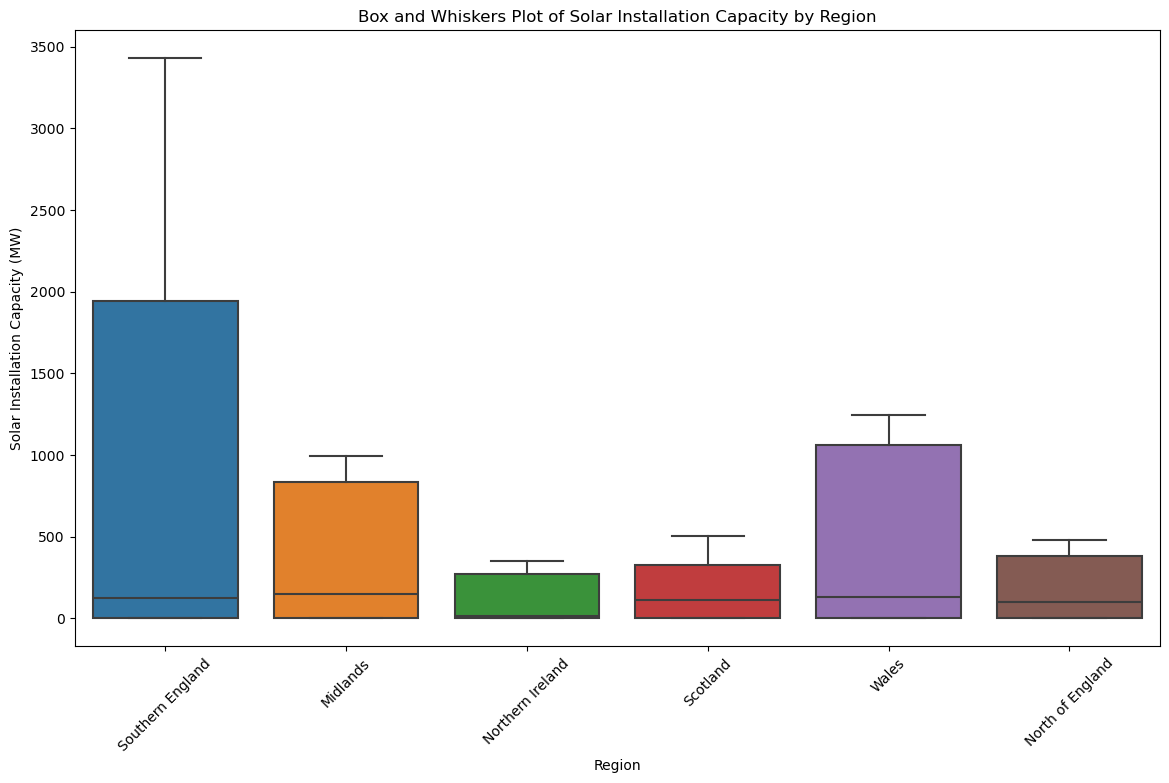

In [ ]:
import seaborn as sns
# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Capacity', data=melted_data)
plt.xticks(rotation=45)
plt.title('Box and Whiskers Plot of Solar Installation Capacity by Region')
plt.xlabel('Region')
plt.ylabel('Solar Installation Capacity (MW)')

## Vizulisation
### Scatter Diagram to see the relationship between mean annual sunshine hours
### per region and its correlation with mean solar installation


In [ ]:
solar_capacity_data

Region  2003  2004  2005  2006  2007  2008  2009   2010    2011  \
0          Midlands   0.0   0.0   0.0   0.0   0.0   0.0   0.0    4.0    62.0   
1  North of England   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.5    41.5   
2  Northern Ireland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    1.0     2.0   
3          Scotland   0.0   0.0   0.0   0.0   0.0   0.0   0.0    2.0    47.0   
4  Southern England  0.25  0.25  0.25  0.25  0.25  0.25  0.25  10.25  132.75   
5             Wales   0.0   0.0   0.0   0.0   0.0   0.0   0.0    3.0    60.0   

    2012   2013    2014     2015     2016    2017    2018     2019    2020  \
0  118.0  175.0   285.0    549.0    737.0   830.0   841.0    873.0   883.0   
1   83.5  116.5   158.5    264.5    346.5   378.5   400.0    429.5   437.5   
2    6.0   27.0    62.0    105.0    134.0   252.0   322.0    334.0   336.0   
3   91.0  127.0   167.0    240.0    292.0   323.0   347.0    394.0   420.0   
4  221.5  415.0  848.25  1459.25  1758.75  1826.5  1844.0  1900.75  1929.5   
5  109.0  149.0   374.0    696.0    962.0  1055.0  1073.0   1093.0  1123.0   

      2021    2022  
0    908.0   992.0  
1    448.0   478.5  
2    340.0   352.0  
3    452.0   503.0  
4  1970.75  2065.0  
5   1213.0  1247.0

In [ ]:
solar_capacity_data = pd.DataFrame({
    'Region': ['Midlands', 'North of England', 'Northern Ireland', 'Scotland', 'Southern England', 'Wales'],
    '2003': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2004': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2005': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2006': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2007': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2008': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2009': [0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
    '2010': [4.0, 2.5, 1.0, 2.0, 10.25, 3.0],
    '2011': [62.0, 41.5, 2.0, 47.0, 132.75, 60.0],
    '2012': [118.0, 83.5, 6.0, 91.0, 221.5, 109.0],
    '2013': [175.0, 116.5, 27.0, 127.0, 415.0, 149.0],
    '2014': [285.0, 158.5, 62.0, 167.0, 848.25, 374.0],
    '2015': [549.0, 264.5, 105.0, 240.0, 1459.25, 696.0],
    '2016': [737.0, 346.5, 134.0, 292.0, 1758.75, 962.0],
    '2017': [830.0, 378.5, 252.0, 323.0, 1826.5, 1055.0],
    '2018': [841.0, 400.0, 322.0, 347.0, 1844.0, 1073.0],
    '2019': [873.0, 429.5, 334.0, 394.0, 1900.75, 1093.0],
    '2020': [883.0, 437.5, 336.0, 420.0, 1929.5, 1123.0],
    '2021': [908.0, 448.0, 340.0, 452.0, 1970.75, 1213.0],
    '2022': [992.0, 478.5, 352.0, 503.0, 2065.0, 1247.0]
})

In [ ]:
# Calculate the mean solar capacity for each region across all years
mean_solar_capacity = solar_capacity_data.set_index('Region').mean(axis=1).reset_index()
mean_solar_capacity.columns = ['Region', 'Mean_Solar_Capacity']

In [ ]:
mean_solar_capacity

Region  Mean_Solar_Capacity
0          Midlands              362.850
1  North of England              179.275
2  Northern Ireland              113.650
3          Scotland              170.250
4  Southern England              819.200
5             Wales              457.850

In [ ]:
# Calculate the mean solar capacity for each region across all years
mean_solar_capacity = solar_capacity_data.set_index('Region').mean(axis=1).reset_index()
mean_solar_capacity.columns = ['Region', 'Mean_Solar_Capacity']

In [ ]:
# Read in DataFrames
summary_df = pd.DataFrame({
    'Region': ['Wales', 'Scotland', 'Midlands', 'England S', 'England N', 'Northern Ireland'],
    'Mean Sunshine Hours': [115.321194, 98.052218, 116.419336, 127.463023, 111.735659, 104.246645]
})

mean_solar_capacity = pd.DataFrame({
    'Region': ['Midlands', 'North of England', 'Northern Ireland', 'Scotland', 'Southern England', 'Wales'],
    'Mean_Solar_Capacity': [362.850, 179.275, 113.650, 170.250, 819.200, 457.850]
})

In [ ]:
# Merge the two DataFrames on the 'Region' column
merged_df = pd.merge(summary_df, mean_solar_capacity, left_on='Region', right_on='Region')

In [ ]:
# Ensure that region names match between the two DataFrames
mean_solar_capacity.replace({'Region': {'North of England': 'England N', 'Southern England': 'England S'}}, inplace=True)

In [ ]:
# Merge the two DataFrames on the 'Region' column
merged_df = pd.merge(summary_df, mean_solar_capacity, on='Region')

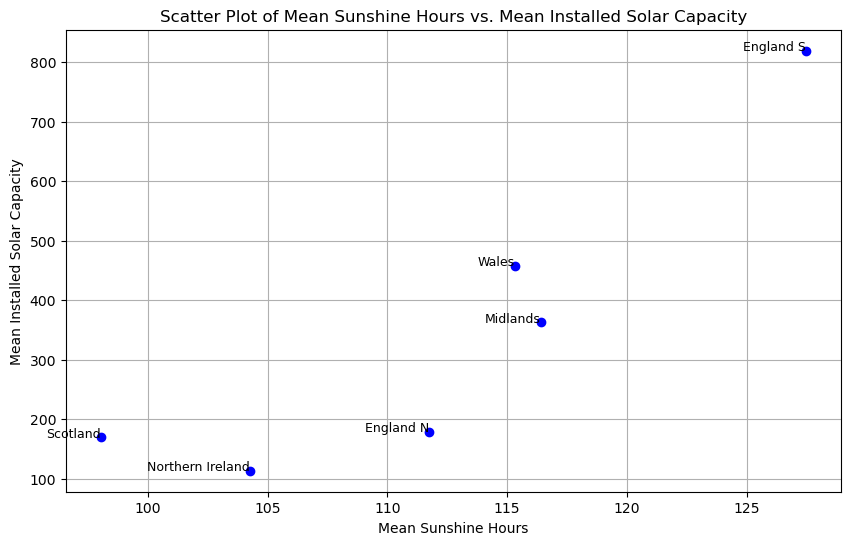

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Mean Sunshine Hours'], merged_df['Mean_Solar_Capacity'], color='blue')

# Add labels and title
for i, row in merged_df.iterrows():
    plt.text(row['Mean Sunshine Hours'], row['Mean_Solar_Capacity'], row['Region'], fontsize=9, ha='right')

plt.title('Scatter Plot of Mean Sunshine Hours vs. Mean Installed Solar Capacity')
plt.xlabel('Mean Sunshine Hours')
plt.ylabel('Mean Installed Solar Capacity')
plt.grid(True)

# Show plot
plt.show()

In [ ]:
!G